In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap, BoundaryNorm

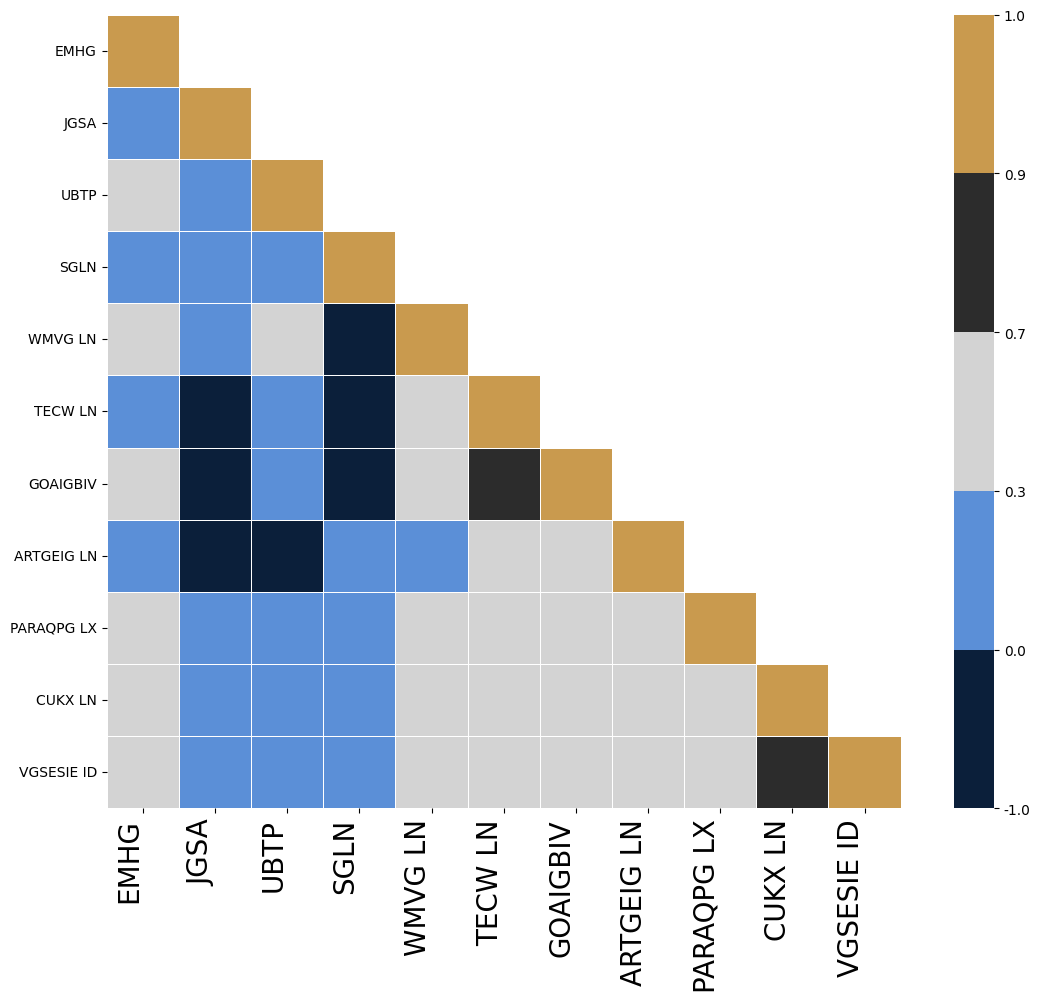

In [38]:
# 1) Compute correlation matrix on log-returns
#    (you can also use simple returns: df_simple.corr())
df_log = (
    pd.read_excel('optimal_portfolio/log_returns.xlsx',  # or whatever your filename is
                  sheet_name=0,
                  parse_dates=['Date'])
      .set_index('Date')
      .sort_index()
)
corr = df_log.corr()

# 2) Prepare colormap & bins exactly as you specified
bins   = [-1.0, 0.0, 0.3, 0.7, 0.9, 1.0]

colors = [
    "#0B1F3A",  # strongly negative
    "#5B8FD7",  # mildly negative
    "#D3D3D3",  # neutral (zero-ish)
    "#2C2C2C",  # mildly positive
    "#C99A4E",  # strongly positive
]

cmap   = ListedColormap(colors)
norm   = BoundaryNorm(bins, len(colors))

# 3) Build a mask for the upper triangle (so you only see the lower half)
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# 4) Plot
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    norm=norm,
    square=True,
    cbar=True,
    linewidths=0.5,
    xticklabels=True,
    yticklabels=True,
    cbar_kws={'ticks': bins,
              "format": "%.1f",
              "shrink": 1}
)
plt.xticks(rotation=90, ha='right', fontsize=20)
plt.tight_layout()
plt.savefig('figures/correlation_matrix.png')
plt.show()